In [1]:
%pylab inline
import os
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score

import tensorflow as tf
import keras



Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [0]:
# To stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

In [111]:
root_dir = os.path.abspath('../..')
data_dir = os.path.join(root_dir, 'data')
sub_dir = os.path.join(root_dir, 'sub')
# check for existence
os.path.exists(root_dir)
os.path.exists(data_dir)
os.path.exists(sub_dir)

False

In [4]:
!wget https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_I5njJSF.csv

--2019-02-02 18:44:24--  https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_I5njJSF.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.20
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90010 (88K) [text/csv]
Saving to: ‘sample_submission_I5njJSF.csv’

sample_submission_I 100%[===================>]  87.90K   189KB/s    in 0.5s    

2019-02-02 18:44:25 (189 KB/s) - ‘sample_submission_I5njJSF.csv’ saved [90010/90010]



In [5]:
!wget https://datahack-prod.s3.amazonaws.com/train_zip/train_LbELtWX.zip

--2019-02-02 18:44:41--  https://datahack-prod.s3.amazonaws.com/train_zip/train_LbELtWX.zip
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.24
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82498602 (79M) [application/zip]
Saving to: ‘train_LbELtWX.zip’

train_LbELtWX.zip   100%[===================>]  78.68M  12.8MB/s    in 7.7s    

2019-02-02 18:44:50 (10.2 MB/s) - ‘train_LbELtWX.zip’ saved [82498602/82498602]



In [6]:
!unzip train_LbELtWX.zip

Archive:  train_LbELtWX.zip
   creating: train/
 extracting: train/3751.png          
 extracting: train/1986.png          
 extracting: train/46774.png         
 extracting: train/1386.png          
 extracting: train/11162.png         
 extracting: train/52576.png         
 extracting: train/24590.png         
 extracting: train/780.png           
 extracting: train/46235.png         
 extracting: train/22625.png         
 extracting: train/48961.png         
 extracting: train/51857.png         
 extracting: train/15658.png         
 extracting: train/6660.png          
 extracting: train/46576.png         
 extracting: train/23201.png         
 extracting: train/26622.png         
 extracting: train/16475.png         
 extracting: train/50593.png         
 extracting: train/8611.png          
 extracting: train/2259.png          
 extracting: train/23122.png         
 extracting: train/20565.png         
 extracting: train/59996.png         
 extracting: train/16779.png         
 e

In [8]:
!wget https://datahack-prod.s3.amazonaws.com/test_zip/test_ScVgIM0.zip

--2019-02-02 18:47:41--  https://datahack-prod.s3.amazonaws.com/test_zip/test_ScVgIM0.zip
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.12
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13781763 (13M) [application/zip]
Saving to: ‘test_ScVgIM0.zip’

test_ScVgIM0.zip    100%[===================>]  13.14M  5.08MB/s    in 2.6s    

2019-02-02 18:47:45 (5.08 MB/s) - ‘test_ScVgIM0.zip’ saved [13781763/13781763]



In [9]:
!unzip test_ScVgIM0.zip

Archive:  test_ScVgIM0.zip
   creating: test/
 extracting: test/62791.png          
 extracting: test/68779.png          
 extracting: test/66131.png          
 extracting: test/62751.png          
 extracting: test/65428.png          
 extracting: test/66442.png          
 extracting: test/61995.png          
 extracting: test/62664.png          
 extracting: test/63642.png          
 extracting: test/62351.png          
 extracting: test/67109.png          
 extracting: test/66331.png          
 extracting: test/60875.png          
 extracting: test/67314.png          
 extracting: test/69721.png          
 extracting: test/65691.png          
 extracting: test/64480.png          
 extracting: test/62158.png          
 extracting: test/61644.png          
 extracting: test/63101.png          
 extracting: test/68488.png          
 extracting: test/64250.png          
 extracting: test/67984.png          
 extracting: test/64831.png          
 extracting: test/61187.png          
 ext

In [117]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

sample_submission = pd.read_csv('sample_submission_I5njJSF.csv')

train.head(),test.head(10)

(   id  label
 0   1      9
 1   2      0
 2   3      0
 3   4      3
 4   5      0,       id
 0  60001
 1  60002
 2  60003
 3  60004
 4  60005
 5  60006
 6  60007
 7  60008
 8  60009
 9  60010)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


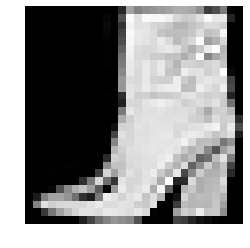

In [118]:
img_name = rng.choice(train.id)
filepath = os.path.join('train', str(img_name) + '.png')

img = imread(filepath, flatten=True)

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [119]:
img

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,  40., 163., 131., 143., 149., 155., 162., 173., 172., 166.,
        143.,  60.,  79., 123.,   5.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   5.,
          0.,  81., 250., 225., 249., 246., 246., 239., 215., 202., 206.,
        224., 248., 231., 232.,  35.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  12.,
          0.,  51., 242., 226., 227., 215., 210., 199., 181., 181., 195.,
        205., 219., 218., 207.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   7.,
          0.,  68., 249., 232., 229., 221., 197., 190., 190., 189., 198.,
        221., 193., 200., 243.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,
          0.,  78., 247., 231., 226., 220., 234., 217., 187., 201., 215.,
        255., 160., 178., 214.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [120]:
#For easier data manipulation, let’s store all our images as numpy arrays

temp = []
for img_name in train.id:
    image_path = os.path.join('train', str(img_name) + '.png')
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
train_x = np.stack(temp)

train_x /= 255.0
train_x = train_x.reshape(-1, 784).astype('float32')

temp = []
for img_name in test.id:
    image_path = os.path.join('test', str(img_name) + '.png')
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


In [0]:
test_x = np.stack(temp)

In [0]:
# to test the proper functioning of our model we create a validation set. Let’s take a split size of 70:30 for train set vs 
# validation set
split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train.label.values[:split_size], train.label.values[split_size:]

In [123]:
train_x.shape

(42000, 784)

In [0]:
# Now we define some helper functions, which we use later on, in our programs
def dense_to_one_hot(labels_dense, num_classes=10):
    """Convert class labels from scalars to one-hot vectors"""
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    
    return labels_one_hot

def preproc(unclean_batch_x):
    """Convert values to range 0-1"""
    temp_batch = unclean_batch_x / unclean_batch_x.max()
    
    return temp_batch

def batch_creator(batch_size, dataset_length, dataset_name):
    """Create batch with random samples and return appropriate format"""
    batch_mask = rng.choice(dataset_length, batch_size)
    
    batch_x = eval(dataset_name + '_x')[[batch_mask]].reshape(-1, input_num_units)
    batch_x = preproc(batch_x)
    
    if dataset_name == 'train':
        batch_y = eval(dataset_name).ix[batch_mask, 'label'].values
        batch_y = dense_to_one_hot(batch_y)
        
    return batch_x, batch_y

In [0]:
# Now comes the main part! Let us define our neural network architecture. We define a neural network with 3 layers;  
# input, hidden and output. The number of neurons in input and output are fixed, as the input is our 28 x 28 image and 
# the output is a 10 x 1 vector representing the class. We take 500 neurons in the hidden layer. This number can vary 
# according to need. We also assign values to remaining variables. 
### set all variables

# number of neurons in each layer--------------------------
input_num_units = 28*28
hidden_num_units = 500
output_num_units = 10

# define placeholders--------------------------------------
x = tf.placeholder(tf.float32, [None, input_num_units])
y = tf.placeholder(tf.float32, [None, output_num_units])

# set remaining variables----------------------------------
epochs = 5
batch_size = 128
learning_rate = 0.01

### define weights and biases of the neural network (refer this article if you don't understand the terminologies)

weights = {
    'hidden': tf.Variable(tf.random_normal([input_num_units, hidden_num_units], seed=seed)),
    'output': tf.Variable(tf.random_normal([hidden_num_units, output_num_units], seed=seed))
}

biases = {
    'hidden': tf.Variable(tf.random_normal([hidden_num_units], seed=seed)),
    'output': tf.Variable(tf.random_normal([output_num_units], seed=seed))
}

In [0]:
# Now create our neural networks computational graph------------------------
hidden_layer = tf.add(tf.matmul(x, weights['hidden']), biases['hidden'])
hidden_layer = tf.nn.relu(hidden_layer)

output_layer = tf.matmul(hidden_layer, weights['output']) + biases['output']

In [127]:
# Also, we need to define cost of our neural network
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output_layer,labels= y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
# And set the optimizer, i.e. our backpropogation algorithm. Here we use Adam, which is an efficient variant of Gradient Descent 
# algorithm. There are a number of other optimizers available in tensorflow 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [129]:
# After defining our neural network architecture, let’s initialize all the variables
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [130]:
# Now let us create a session, and run our neural network in the session. We also validate our models accuracy on validation set 
# that we created
with tf.Session() as sess:
    # create initialized variables
    sess.run(init)
    
    ### for each epoch, do:
    ###   for each batch, do:
    ###     create pre-processed batch
    ###     run optimizer by feeding batch
    ###     find cost and reiterate to minimize
    
    for epoch in range(epochs):
        avg_cost = 0
        total_batch = int(train.shape[0]/batch_size)
        for i in range(total_batch):
            batch_x, batch_y = batch_creator(batch_size, train_x.shape[0], 'train')
            _, c = sess.run([optimizer, cost], feed_dict = {x: batch_x, y: batch_y})
            
            avg_cost += c / total_batch
            
        print("Epoch:", (epoch+1), "cost =", "{:.5f}".format(avg_cost))
    
    print("\nTraining complete!")
    
    
    # find predictions on val set
    pred_temp = tf.equal(tf.argmax(output_layer, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(pred_temp, "float"))
    print("Validation Accuracy:", accuracy.eval({x: val_x.reshape(-1, input_num_units), y: dense_to_one_hot(val_y)}))
    
    predict = tf.argmax(output_layer, 1)
    pred = predict.eval({x: test_x.reshape(-1, input_num_units)})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Epoch: 1 cost = 15.52171
Epoch: 2 cost = 6.19943
Epoch: 3 cost = 3.94866
Epoch: 4 cost = 2.48921
Epoch: 5 cost = 1.77943

Training complete!
Validation Accuracy: 0.83016664


Prediction is:  1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


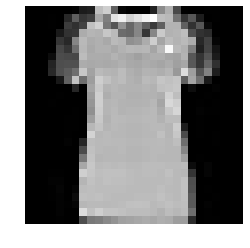

In [132]:
img_name = rng.choice(test.id)
filepath = os.path.join('test', str(img_name) + '.png')

img = imread(filepath, flatten=True)

test_index = int(img_name) - 60000

print("Prediction is: ", pred[test_index])

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [0]:
# Now let’s create a submission
sample_submission.id = test.id

sample_submission.label = pred

sample_submission.to_csv(os.path.join('sub01.csv'), index=False)

In [0]:
from google.colab import files
files.download('sub01.csv')